## Macro-dynamique : Chômage et inflation aux États-Unis

L3 MIASHS 2023-2024

*Mathis Derenne - Léo Larriven*

---

### Preprocessing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
# Liste des noms de fichiers et des nouvelles colonnes
files = ['Data/Inflation GDP deflator.csv', 'Data/Inflation consumer prices.csv', 'Data/Labor Markets Unemployment Rate.csv', 'Data/Business Cycle.csv', 'Data/Household Consumption.csv', 'Data/Assets Direct Investment.csv']
col_names = ['inflation GDP deflator', 'inflation consumer prices', 'unemployment rate', 'cycle', 'household consumption', 'assets direct investment']

# Lire le premier fichier et renommer la deuxième colonne
df = pd.read_csv(files[0], parse_dates=[0])
df = df.rename(columns={df.columns[1]: col_names[0]})

# Boucle sur les autres fichiers
for file, col_name in zip(files[1:], col_names[1:]):
    temp = pd.read_csv(file, parse_dates=[0])
    temp = temp.rename(columns={temp.columns[1]: col_name})
    df = pd.merge(df, temp, on='timestamp', how='inner')

### Statistics information and basic plotting

In [25]:
# Aperçu statistique
df.describe()

,timestamp,inflation GDP deflator,inflation consumer prices,unemployment rate,cycle,household consumption,assets direct investment
count,31,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01
mean,2005-12-31 20:54:11.612903168,2.040012,2.386408,6.383226,3.387097,9.091622e+12,4.643145e+12
min,1991-01-01 00:00:00,0.640955,-0.355546,3.980000,1.000000,3.943449e+12,9.433640e+11
25%,1998-07-02 12:00:00,1.641481,1.631133,5.120000,2.500000,6.080503e+12,2.376118e+12
50%,2006-01-01 00:00:00,1.917933,2.442583,6.240000,3.000000,9.277236e+12,4.047170e+12
75%,2013-07-02 12:00:00,2.324625,2.990238,7.220000,5.000000,1.160563e+13,7.088898e+12
max,2021-01-01 00:00:00,4.492792,4.697859,10.560000,5.000000,1.590258e+13,1.092551e+13
std,NaN,0.787002,1.080858,1.666818,1.382689,3.438082e+12,2.798011e+12


### Présentation du jeux de données choisis :

> Contexte : les données concernent les États-Unis et s'étalent entre 1991 et 2021 avec une fréquence annuelle.

Les variables macro-économique choisis sont les suivantes : 

- *inflation, GDP deflator (A, %)*
- *inflation, consumer prices (A, %)*
- *unemployment rate (A, %)*
- *cycle (A, %)* : business cycle proposées par TacEconomics pour les États-Unis.
- *household consumption and NISPHs (A, $)*
- *assets direct investment (A, $)* 

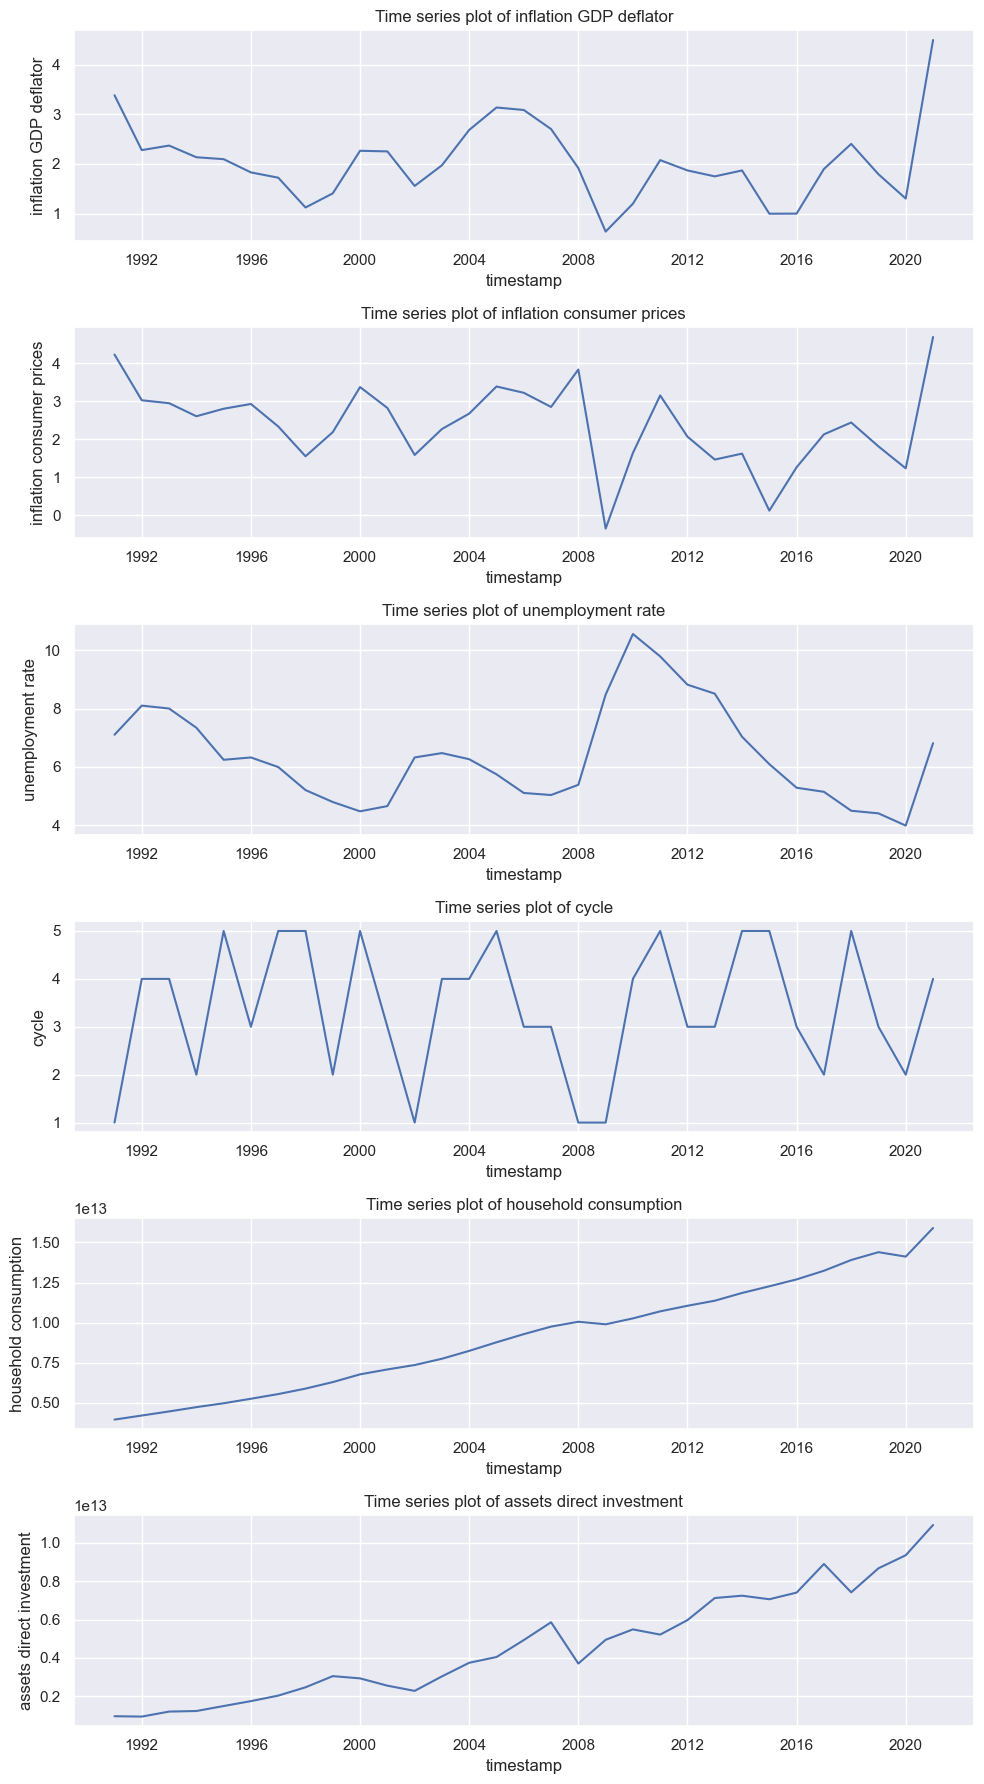

In [26]:
def basic_plot(df):
    # Nombre de colonnes à tracer
    num_cols = len(df.columns) - 1

    # Créer une grille de subplots avec un axe des x partagé
    fig, axs = plt.subplots(num_cols, 1, figsize=(10, num_cols*3), sharex=False)

    # Tracer chaque colonne
    for ax, col in zip(axs, df.columns[1:len(df.columns)]):
        sns.lineplot(data=df, x='timestamp', y=col, ax=ax)
        ax.set_title(f'Time series plot of {col}')

    plt.tight_layout()
    
basic_plot(df)

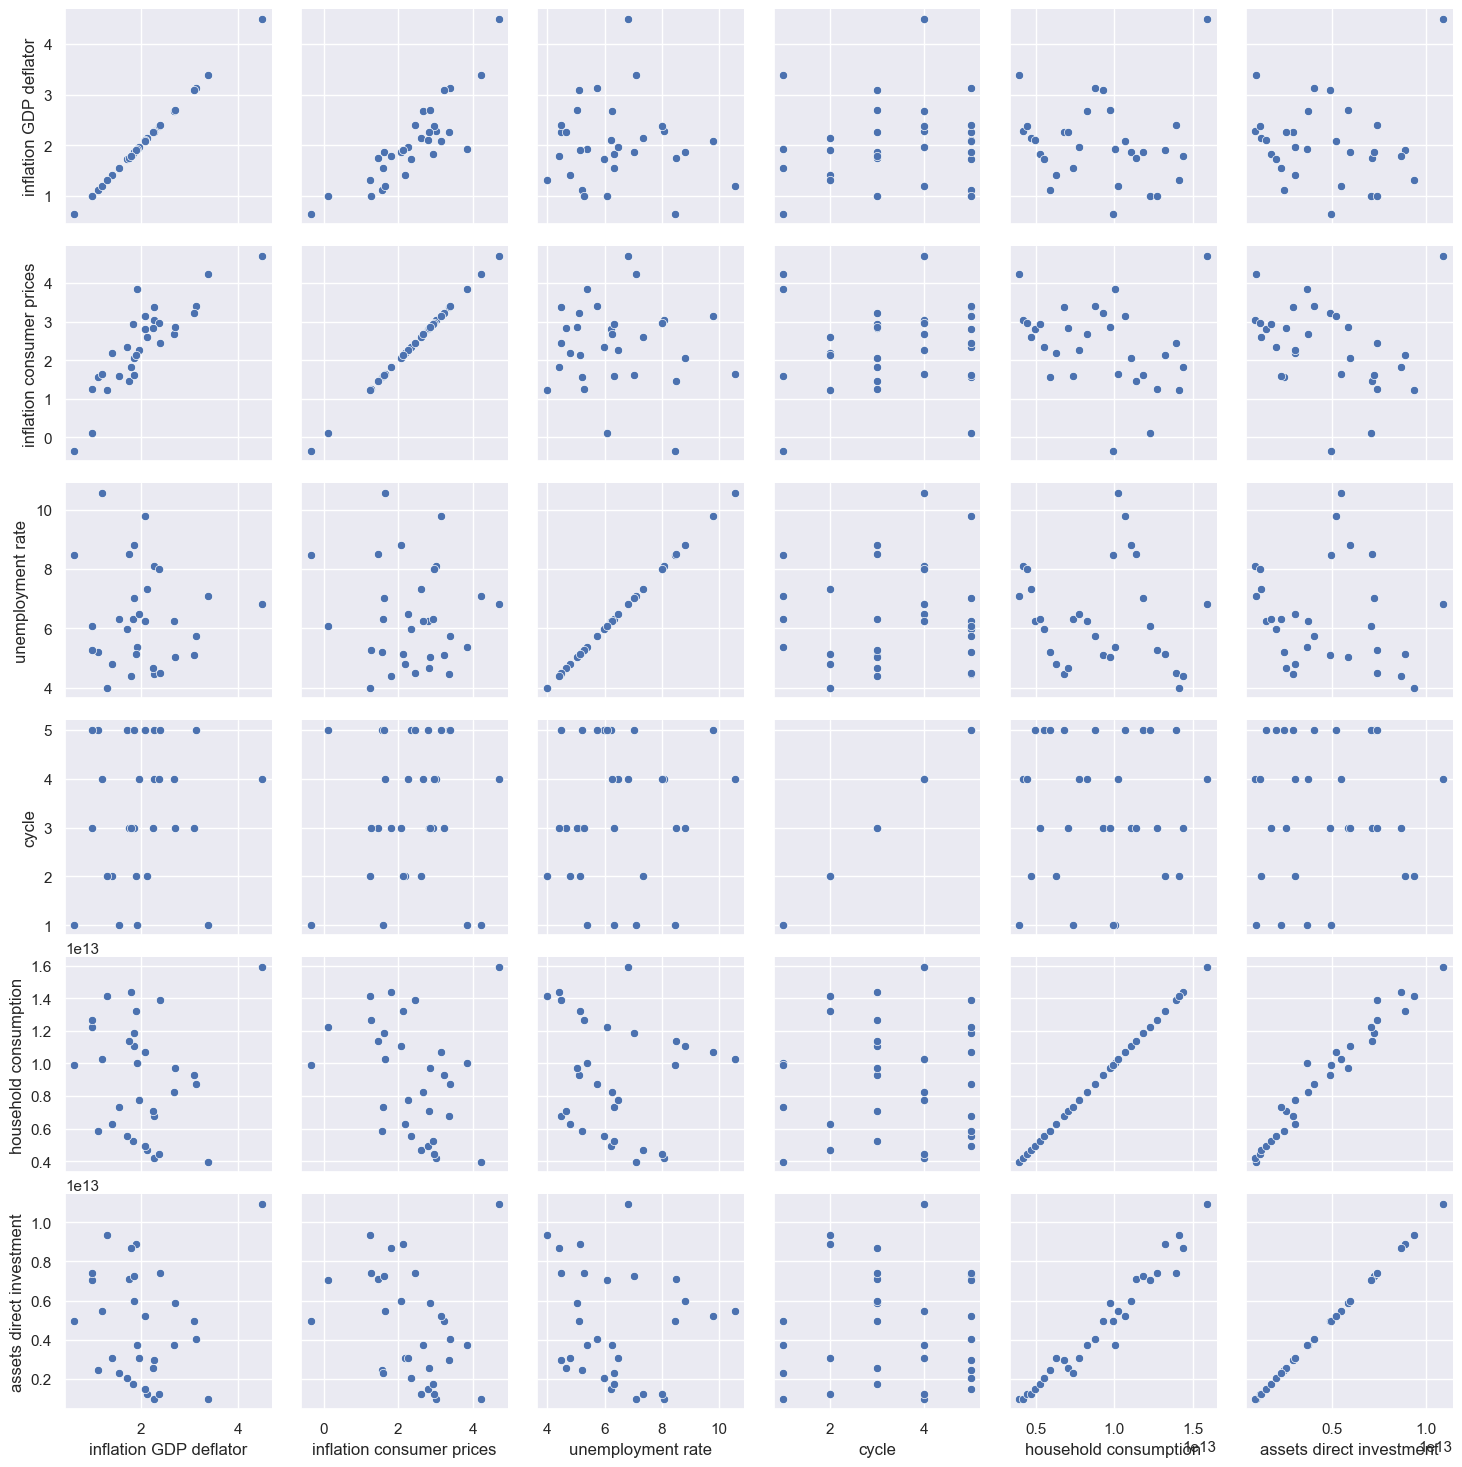

In [27]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

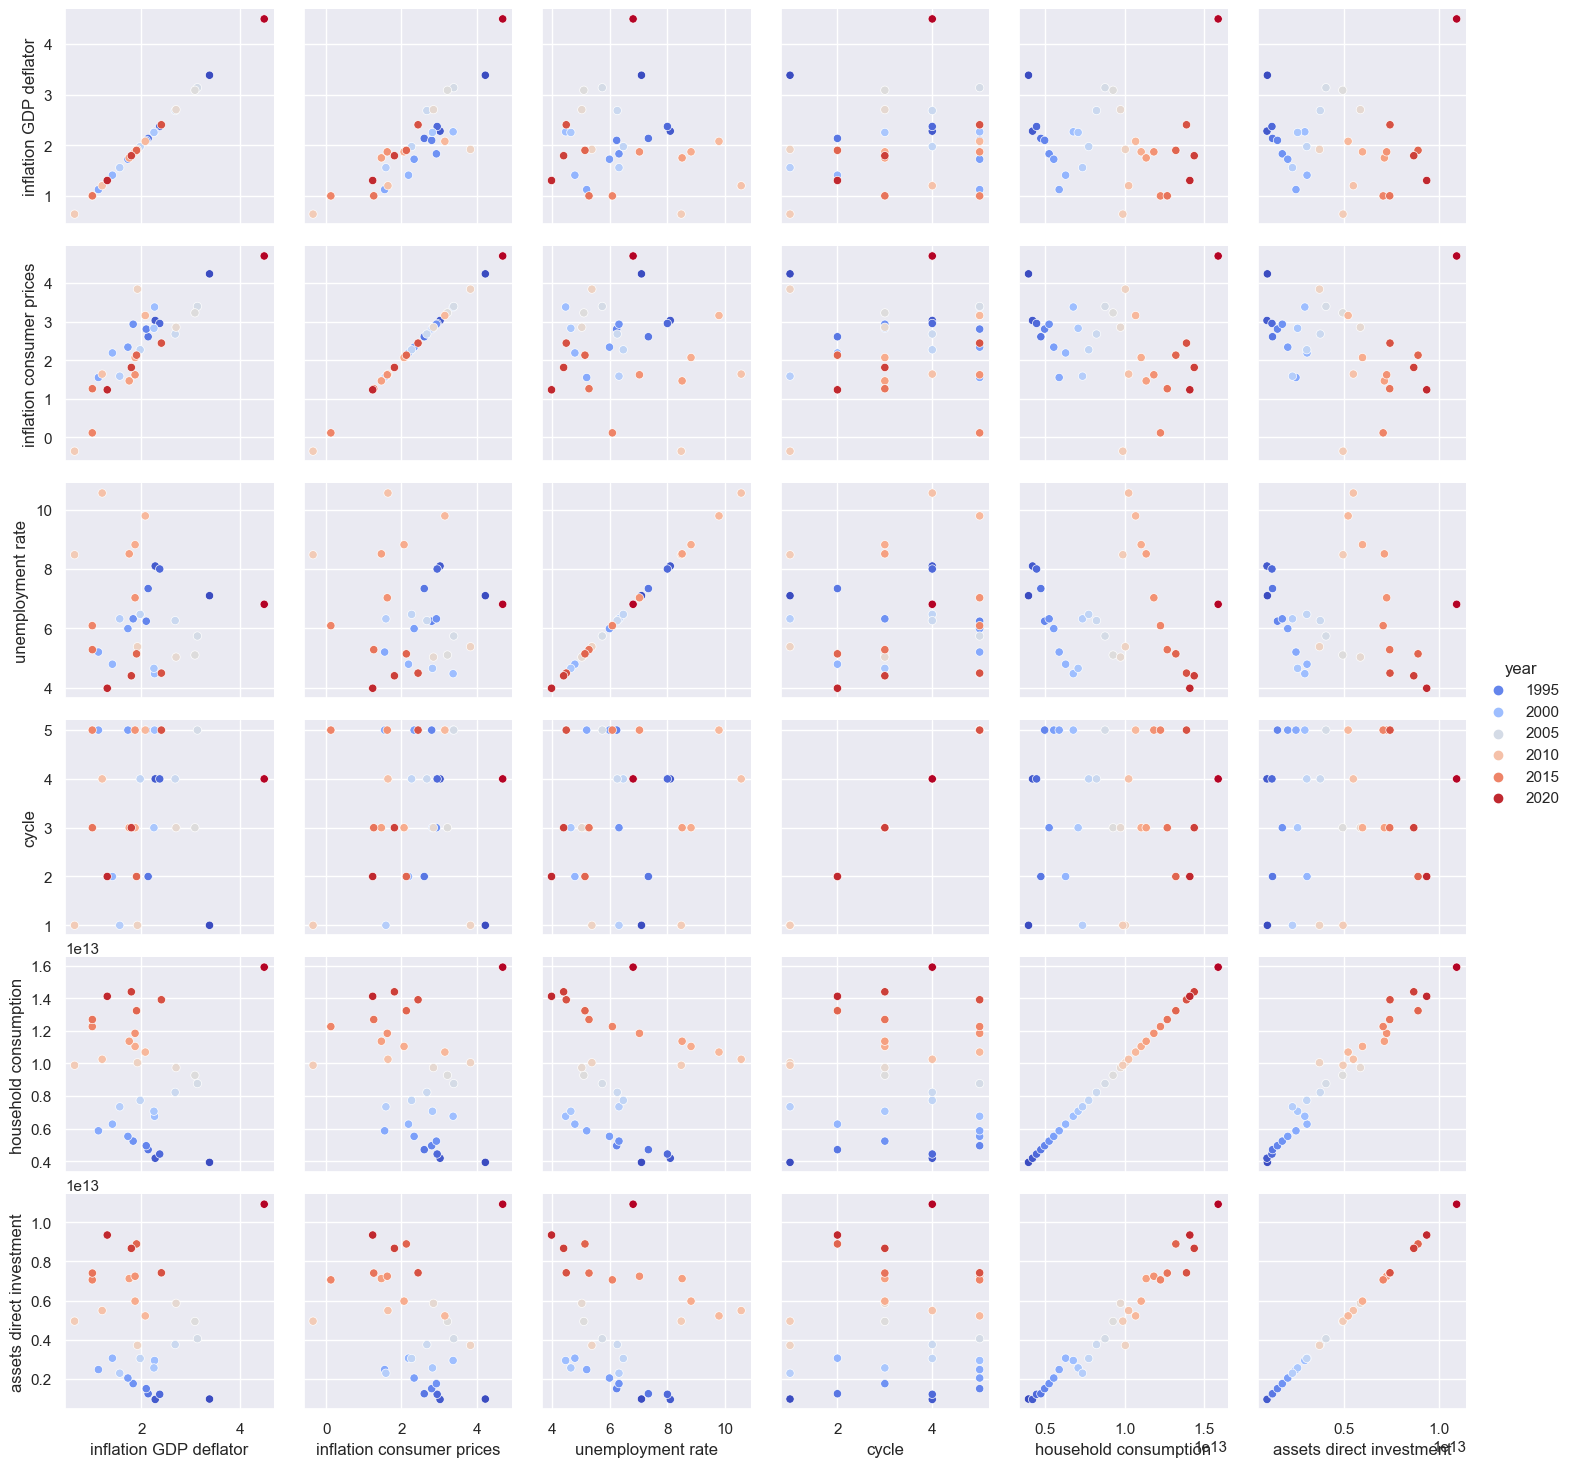

In [28]:
# Extraire l'année de la colonne 'timestamp'
df['year'] = df['timestamp'].dt.year

# Créer un PairGrid avec une variation de couleur en fonction de l'année
g = sns.PairGrid(df, hue='year', palette='coolwarm')
g.map(sns.scatterplot)

# Ajouter une légende
g.add_legend()

- Corrélation positive quasi proportionnelle entre la consommation et les investissements direct  
- Corrélation négative entre la consommation et le taux de chômage

<Axes: >

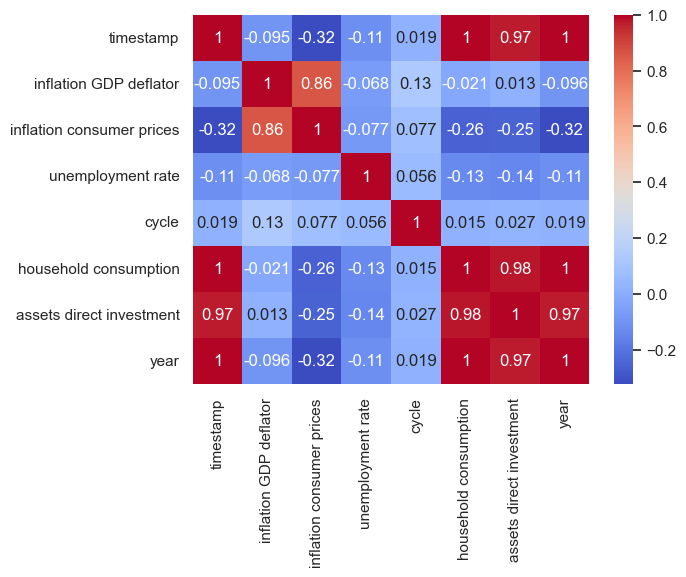

In [29]:
# Calculer la matrice de corrélation
corr = df.corr()

# Créer une heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

Pas d'observation statistiquement pertinente